# Calibrazione degli Scintillatori

### updated to 13th-15th November 2024

Viene eseguita (nuovamente) la calibrazione dei tre rivelatori, raccogliendo una statistica maggiore rispetto a quanto fatto precedentemente (in termini di threshold).

* I conteggi vengono presi al minuto
* Considerata l'area dei nostri rivelatori, ci attendiamo (teoria) 2400 muoni al minuto
* Extra : conteggi di coincidenze doppie (al fine di valutare l'efficienza del rivelatore 2 al variare di V e Th)
* WDT = 169
* $\Delta t$ = 122 ns


### Dettagli tecnici
* Discriminatore : constant fraction

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import uproot

In [9]:
# LateX font:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

## Raccolta Dati

Ogni DataFrame contiene i conteggi (singoli) al minuto dei tre rivelatori (1 = rivelatore in alto, 2 = rivelatore al centro, 3 = rivelatore in basso) relativi ad un singolo voltaggio, cambiando la threshold.

In [24]:
# Rivelatore 1 = in alto, 2 = al centro, 3 = in basso 
data_800V = {
    'V [V]': np.full(11,800),
    'Th [mV]': [0, 1, 2, 3, 4, 5, 10, 25, 40, 50, 75,],     
    'Counts/min_1': [3540, 1270, 580, 315, 203,94, 23, 4, 1, 3, 1],
    'Counts/min_2': [53502, 21301, 8752, 4171, 2637, 2020, 1440 ,177, 30, 14, 4],
    'Counts/min_3': [36024, 15821, 6956, 3836,2527 , 1955, 1483 ,235, 57 , 25, 6],
    'N_doppie_12' : [1547, 801 , 420, 238, 141 , 63, 17, 0, 0 , 0, 0], # Questo non ci serve
    'N_doppie_13' : [1075, 642, 306, 165, 96 , 34, 6, 0 ,0 , 0, 0], # Questo ci serve
    'N_doppie_23' : [3905, 1637, 1386, 1429, 1402,1347, 1127 , 80, 7, 2, 0], # Questo non ci serve 
    'N_triple' : [1047, 639 , 300, 159, 90, 34, 5, 0, 0, 0, 0]
}
df_800V = pd.DataFrame(data_800V)

In [25]:
# Calcolo dell'efficienza a 800 V :
epsilon_2 = df_800V['N_triple'] / df_800V['N_doppie_13'] 
df_800V['epsilon_2'] = epsilon_2

df_800V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,800,0,3540,53502,36024,1547,1075,3905,1047,0.973953
1,800,1,1270,21301,15821,801,642,1637,639,0.995327
2,800,2,580,8752,6956,420,306,1386,300,0.980392
3,800,3,315,4171,3836,238,165,1429,159,0.963636
4,800,4,203,2637,2527,141,96,1402,90,0.937500
5,800,5,94,2020,1955,63,34,1347,34,1.000000
6,800,10,23,1440,1483,17,6,1127,5,0.833333
7,800,25,4,177,235,0,0,80,0,NaN
8,800,40,1,30,57,0,0,7,0,NaN
9,800,50,3,14,25,0,0,2,0,NaN


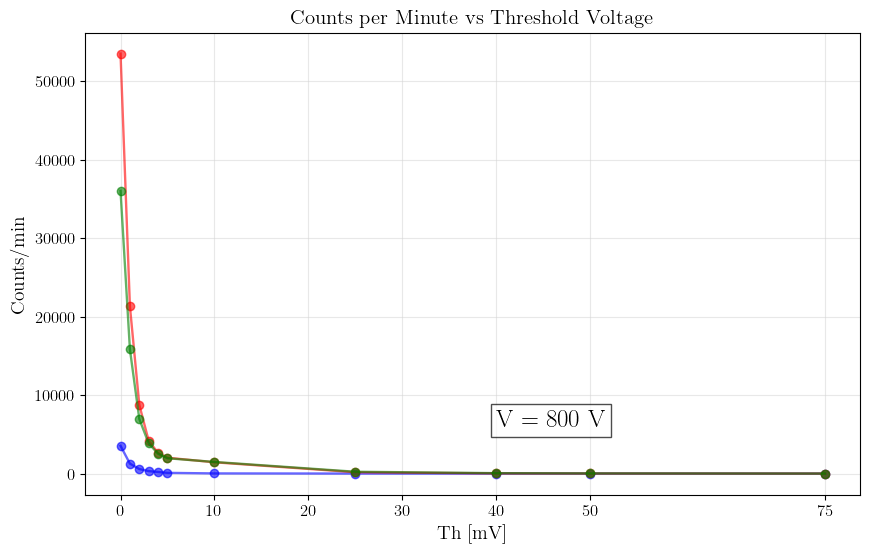

In [26]:
# 800 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_800V['Th [mV]'], df_800V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_800V['Th [mV]'], df_800V['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_800V['Th [mV]'], df_800V['Counts/min_3'], linestyle='-', marker='o',linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
#plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 75], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 6000, 'V = 800 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [27]:
data_850V = {
    'V [V]': np.full(11, 850),  
    'Th [mV]': [0, 1, 2, 3, 5, 10, 25, 50, 75, 100, 125, ],     
    'Counts/min_1': [6610, 3190, 1815, 1053,388, 73, 4, 0, 0, 0, 0, ],  
    'Counts/min_2': [91289, 34951, 19019 , 10676, 4087, 1794, 779, 88,  23, 5, 3, ], 
    'Counts/min_3': [54826, 27681, 16828, 10028,4251,1782, 956, 132, 27, 12, 2,],  
    'N_doppie_12' : [2156, 1407, 1052,713,294,44,1, 0, 0, 0, 0,  ], # Questo non ci serve
    'N_doppie_13' : [1362, 1074 , 785 ,568, 215,32, 0, 0, 0, 0, 0, ], # Questo ci serve
    'N_doppie_23' : [7442, 2344, 1563,1459 , 1419,1318, 479, 38, 3, 1, 0, ], # Questo non ci serve 
    'N_triple' : [1208, 1054, 778, 551, 209,30, 0, 0, 0,0, 0]


}
df_850V = pd.DataFrame(data_850V)

In [28]:
# Calcolo dell'efficienza a 850 V :
epsilon_2 = df_850V['N_triple'] / df_850V['N_doppie_13'] 
df_850V['epsilon_2'] = epsilon_2

df_850V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,850,0,6610,91289,54826,2156,1362,7442,1208,0.886931
1,850,1,3190,34951,27681,1407,1074,2344,1054,0.981378
2,850,2,1815,19019,16828,1052,785,1563,778,0.991083
3,850,3,1053,10676,10028,713,568,1459,551,0.970070
4,850,5,388,4087,4251,294,215,1419,209,0.972093
5,850,10,73,1794,1782,44,32,1318,30,0.937500
6,850,25,4,779,956,1,0,479,0,NaN
7,850,50,0,88,132,0,0,38,0,NaN
8,850,75,0,23,27,0,0,3,0,NaN
9,850,100,0,5,12,0,0,1,0,NaN


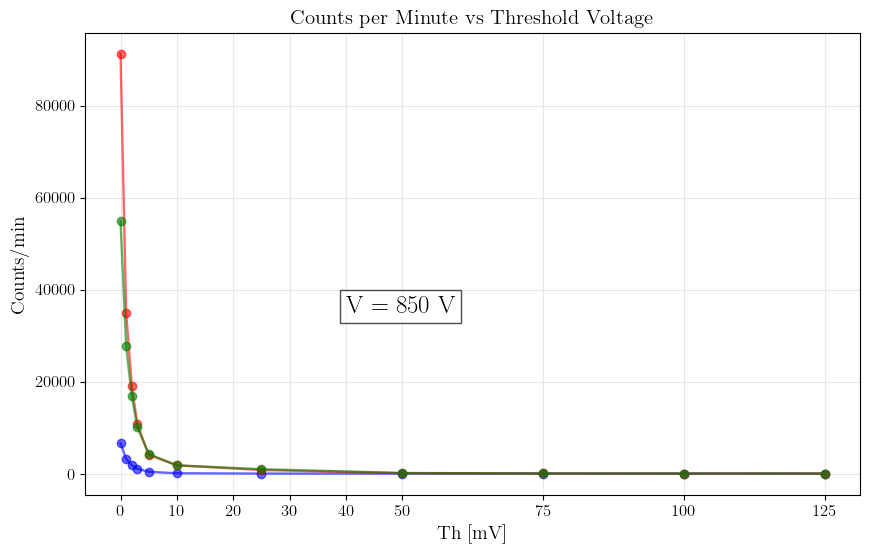

In [29]:
# 850 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_850V['Th [mV]'], df_850V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_850V['Th [mV]'], df_850V['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_850V['Th [mV]'], df_850V['Counts/min_3'], linestyle='-', marker='o', linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
#plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 75, 100, 125], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
#plt.yscale('log')  # Set y-axis to logarithmic scale

# Add the fixed value of V to the plot :
plt.text(40, 35000, 'V = 850 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [30]:
data_900V = {
    'V [V]': np.full(13, 900),  
    'Th [mV]': [0, 2, 5, 10, 15, 25, 30, 35, 50, 75, 100, 125, 150, ],     
    'Counts/min_1': [9646, 3592, 1073, 256, 94, 21, 17,  5, 0, 0, 0, 0, 0,],  
    'Counts/min_2': [163610, 30828,  10027, 2826, 1846,1469, 1263 ,952 ,394, 99, 43, 20, 9] , 
    'Counts/min_3': [79582, 28506,10611, 2984, 1833,1549, 1428 ,1172 , 496, 130, 57, 26, 14],  
    'N_doppie_12' : [2980, 1482,700, 177, 54, 13, 9 , 3 , 0 , 0, 0, 0, 0 ], # Questo non ci serve
    'N_doppie_13' : [1710, 1183,536, 128, 37, 8, 1, 3, 0, 0, 0, 0, 0 ], # Questo ci serve
    'N_doppie_23' : [13651, 2282, 1333, 1366, 1365 ,1179, 991, 673, 212, 16, 15, 4, 4 ], # Questo non ci serve 
    'N_triple' : [1427, 1155, 529, 126, 37, 8, 1, 3 , 0, 0, 0, 0, 0]



}
df_900V = pd.DataFrame(data_900V)

In [31]:
# Calcolo dell'efficienza a 850 V :
epsilon_2 = df_900V['N_triple'] / df_900V['N_doppie_13'] 
df_900V['epsilon_2'] = epsilon_2

df_900V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,900,0,9646,163610,79582,2980,1710,13651,1427,0.834503
1,900,2,3592,30828,28506,1482,1183,2282,1155,0.976331
2,900,5,1073,10027,10611,700,536,1333,529,0.986940
3,900,10,256,2826,2984,177,128,1366,126,0.984375
4,900,15,94,1846,1833,54,37,1365,37,1.000000
5,900,25,21,1469,1549,13,8,1179,8,1.000000
6,900,30,17,1263,1428,9,1,991,1,1.000000
7,900,35,5,952,1172,3,3,673,3,1.000000
8,900,50,0,394,496,0,0,212,0,NaN
9,900,75,0,99,130,0,0,16,0,NaN


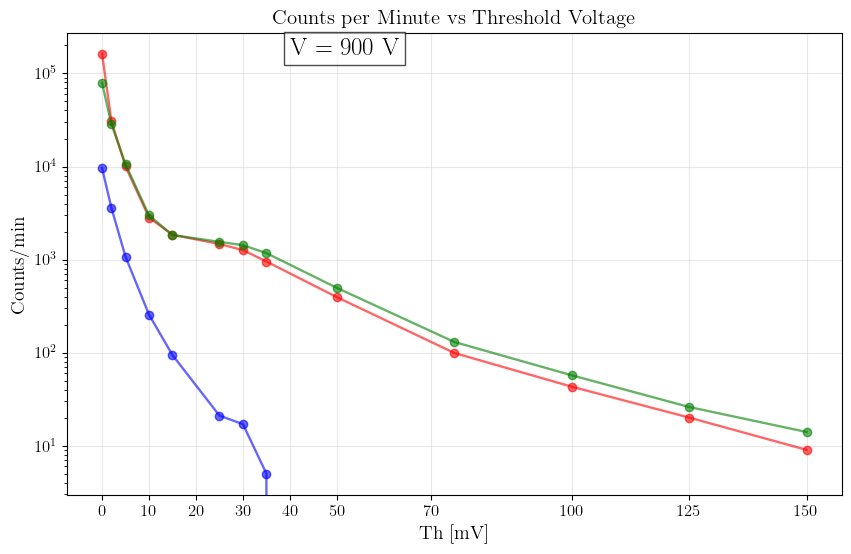

In [59]:
# 900 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_900V['Th [mV]'], df_900V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_900V['Th [mV]'], df_900V['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_900V['Th [mV]'], df_900V['Counts/min_3'], linestyle='-', marker='o', linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
#plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 70, 100, 125, 150], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.yscale('log')  # Set y-axis to logarithmic scale

# Add the fixed value of V to the plot :
plt.text(40, 160000, 'V = 900 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [82]:
data_950V = {
    'V [V]': np.full(14, 950),  
    'Th [mV]': [0, 10, 15, 25, 35, 45, 50, 75, 100, 125, 150, 175, 200, 225 ],     
    'Counts/min_1': [14537, 915, 362, 99, 25, 12,13, 2, 1, 1, 1, 1, 1, 0],  
    'Counts/min_2': [216649, 6682, 3095, 1752, 1647, 1277, 1081, 418, 168, 69, 30, 19, 11, 4, ], 
    'Counts/min_3': [112528, 7417, 3312,1771, 1651, 1387,1313, 548, 232, 79, 40, 21, 17, 4, ],  
    'N_doppie_12' : [4600, 600, 267 ,67, 17, 7,7, 0, 0, 0, 1, 0, 1, 0,], # Questo non ci serve
    'N_doppie_13' : [2051, 450, 177,42, 11, 6, 3, 0, 0, 0, 0, 0, 1, 0,], # Questo ci serve
    'N_doppie_23' : [21521, 1393, 1340,1342, 1325, 966, 802, 222, 60, 14, 8, 0, 3, 2, ], # Questo non ci serve 
    'N_triple' : [1501, 441, 174,42, 10, 6 , 3, 0, 0, 0, 0, 0, 1, 0, ]


}
df_950V = pd.DataFrame(data_950V)

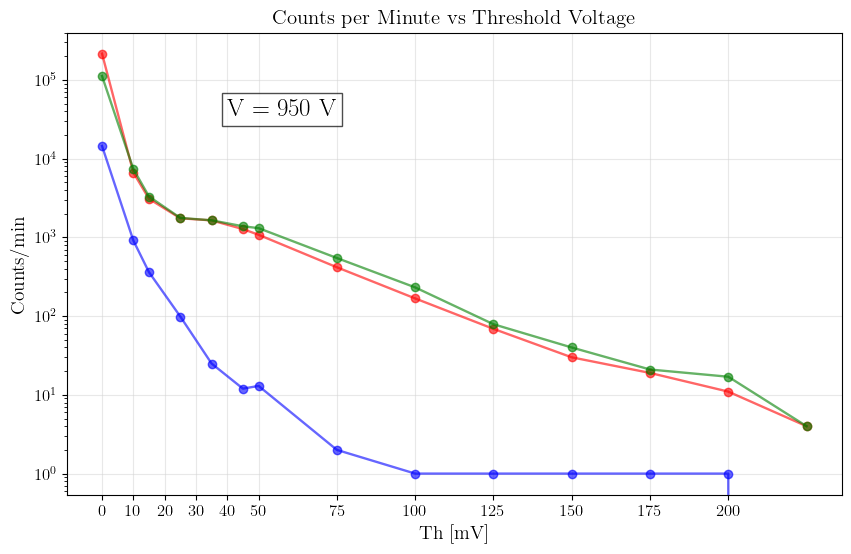

In [84]:
# 950 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_950V['Th [mV]'], df_950V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_950V['Th [mV]'], df_950V['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_950V['Th [mV]'], df_950V['Counts/min_3'], linestyle='-', marker='o', linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
#plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.yscale('log')  # Set y-axis to logarithmic scale

# Add the fixed value of V to the plot :
plt.text(40, 35000, 'V = 950 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [92]:
# Efficienza : 
epsilon_2 = df_950V['N_triple'] / df_950V['N_doppie_13'] 
df_950V['epsilon_2'] = epsilon_2

df_950V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,950,0,14537,216649,112528,4600,2051,21521,1501,0.731838
1,950,10,915,6682,7417,600,450,1393,441,0.980000
2,950,15,362,3095,3312,267,177,1340,174,0.983051
3,950,25,99,1752,1771,67,42,1342,42,1.000000
4,950,35,25,1647,1651,17,11,1325,10,0.909091
5,950,45,12,1277,1387,7,6,966,6,1.000000
6,950,50,13,1081,1313,7,3,802,3,1.000000
7,950,75,2,418,548,0,0,222,0,NaN
8,950,100,1,168,232,0,0,60,0,NaN
9,950,125,1,69,79,0,0,14,0,NaN


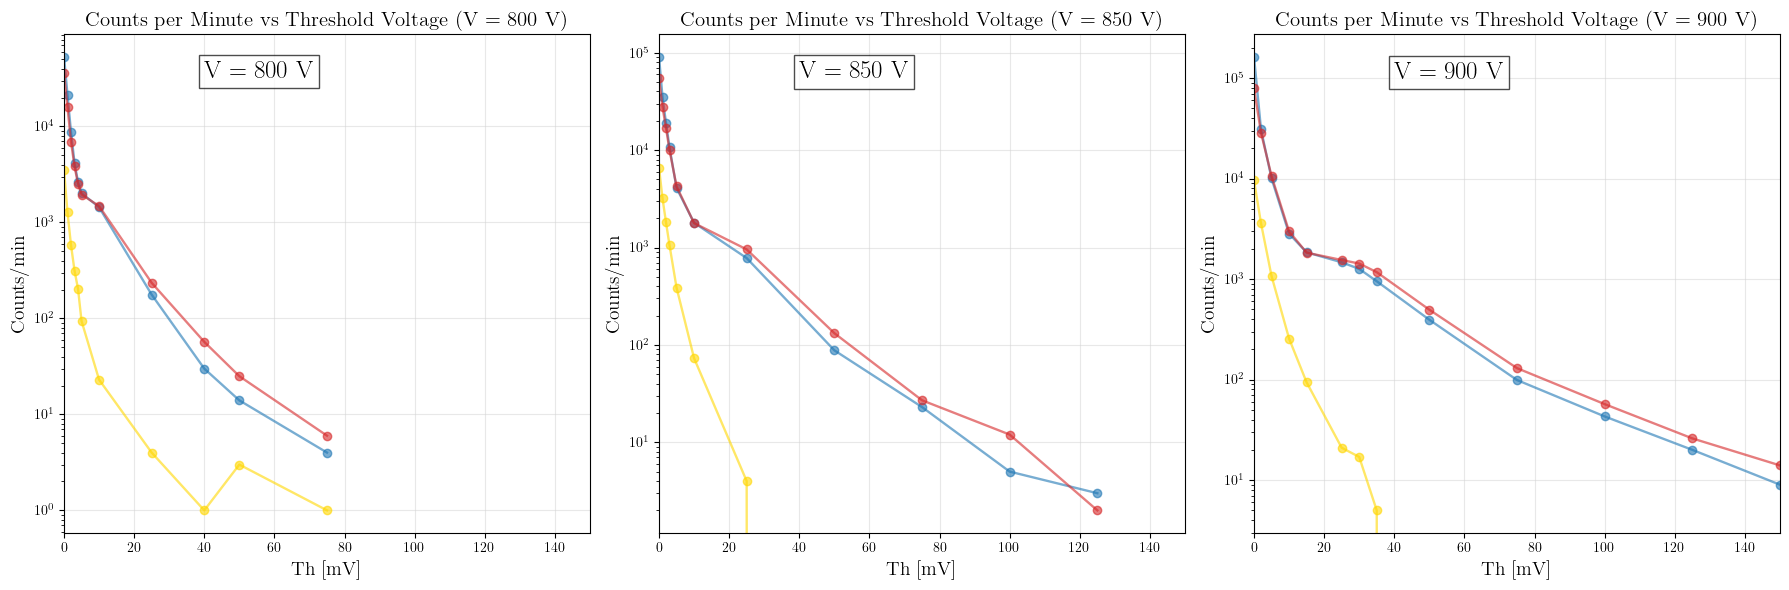

In [56]:
# List of dataframes and corresponding voltages
dataframes = [df_800V, df_850V, df_900V, df_950V, df_1000V, df_1050V, df_1100V, df_1150V, df_1200V, df_1250V, df_1300V]  # Replace/add your actual dataframes here
voltages = [800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300]  # Replace/add the corresponding voltage values

# Create subplots grid (1 row per dataframe)
fig, axes = plt.subplots(1, len(dataframes), figsize=(18, 6), sharex=True)

# Loop over dataframes and axes
for i, (df, V) in enumerate(zip(dataframes, voltages)):
    ax = axes[i]
    ax.plot(df['Th [mV]'], df['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7, color='gold', alpha=0.6)
    ax.plot(df['Th [mV]'], df['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7, color='tab:blue', alpha=0.6)
    ax.plot(df['Th [mV]'], df['Counts/min_3'], linestyle='-', marker='o', linewidth=1.7, color='tab:red', alpha=0.6)

    ax.set_title(f'Counts per Minute vs Threshold Voltage (V = {V} V)', fontsize=15)
    ax.set_xlabel('Th [mV]', fontsize=14)
    ax.set_ylabel('Counts/min', fontsize=14)
    ax.set_xlim(0, df['Th [mV]'].max())
    ax.grid(True, color='lightgray', alpha=0.5)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.text(40, max(df['Counts/min_1'].max(), df['Counts/min_2'].max(), df['Counts/min_3'].max()) * 0.6, 
            f'V = {V} V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    

# Adjust layout
plt.tight_layout()
plt.show()

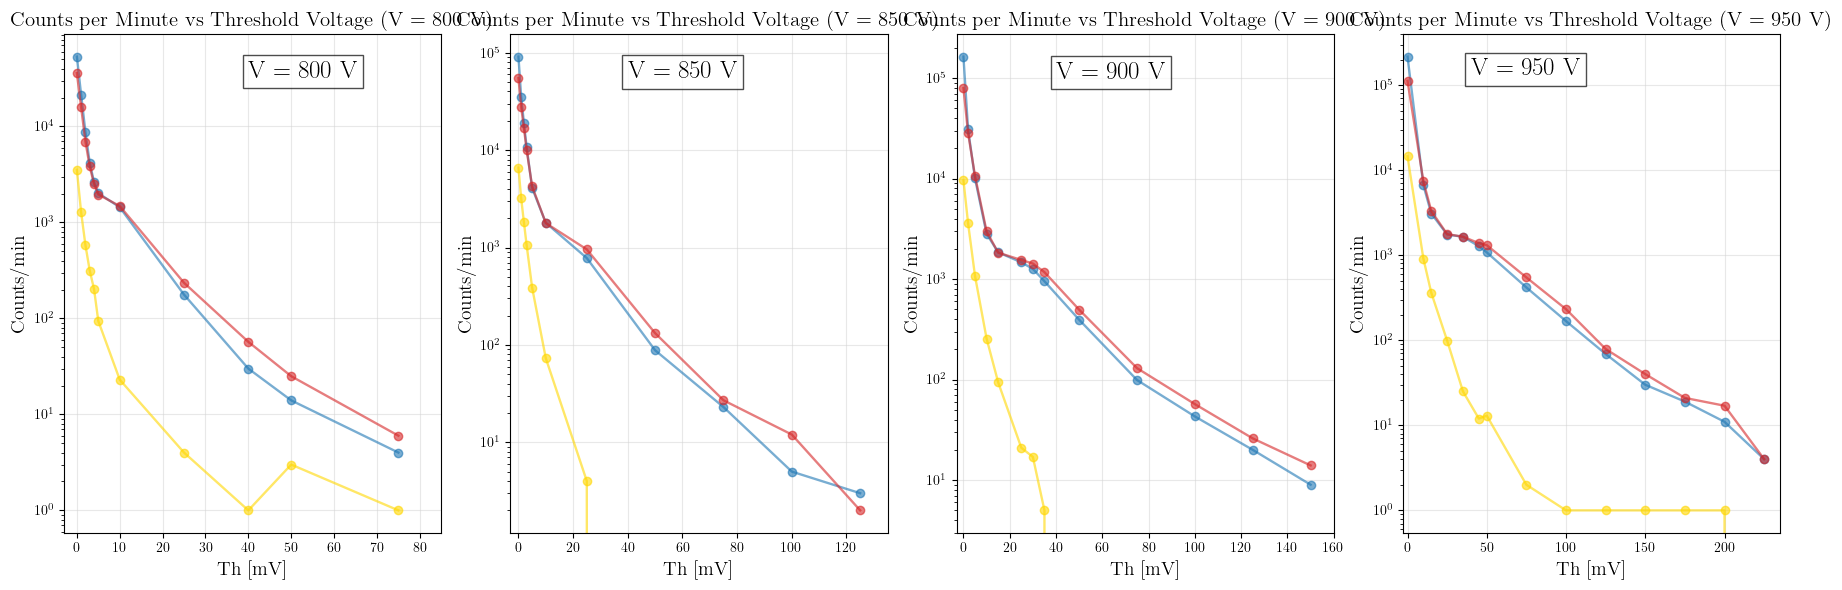

In [91]:
# List of dataframes and corresponding voltages

# TO BE UPDATED !!! 

dataframes = [df_800V, df_850V, df_900V, df_950V]  # Replace/add your actual dataframes here
voltages = [800, 850, 900, 950]  # Replace/add the corresponding voltage values

# Create subplots grid (1 row per dataframe)
fig, axes = plt.subplots(1, len(dataframes), figsize=(18, 6), sharex=False)

# Loop over dataframes and axes
for i, (df, V) in enumerate(zip(dataframes, voltages)):
    ax = axes[i]
    ax.plot(df['Th [mV]'], df['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7, color='gold', alpha=0.6)
    ax.plot(df['Th [mV]'], df['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7, color='tab:blue', alpha=0.6)
    ax.plot(df['Th [mV]'], df['Counts/min_3'], linestyle='-', marker='o', linewidth=1.7, color='tab:red', alpha=0.6)

    ax.set_title(f'Counts per Minute vs Threshold Voltage (V = {V} V)', fontsize=15)
    ax.set_xlabel('Th [mV]', fontsize=14)
    ax.set_ylabel('Counts/min', fontsize=14)
    ax.set_xlim(-3, df['Th [mV]'].max()+10)
    ax.grid(True, color='lightgray', alpha=0.5)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.text(40, max(df['Counts/min_1'].max(), df['Counts/min_2'].max(), df['Counts/min_3'].max()) * 0.6, 
            f'V = {V} V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    

# Adjust layout
plt.tight_layout()
plt.show()

In [134]:
# Dati probabilmente da buttare perché il rivelatore 1 ha cambiato voltaggio ed è molto instabile
data_1000V = {
    'V [V]': np.full(15, 1000),  
    'Th [mV]': [0, 10, 25, 35, 50, 60, 70, 75, 100, 125, 150, 175, 200, 225, 250, ],     
    'Counts/min_1': [25795, 4659, 867, 384, 161, 82, 50, 35, 16, 13, 4, 3, 0, 2, 0, ],  
    'Counts/min_2': [316130, 14685, 2611, 1816, 1590, 1479, 1192, 1083, 568, 293, 152, 80, 53, 19, 10, ], 
    'Counts/min_3': [153021, 16012, 2837, 1822,1567, 1547, 1335,1234, 719, 370, 174, 100, 48, 44, 15,], 
    'N_doppie_12' : [7225, 1422, 564, 259,98, 42, 26,18, 7, 4, 1, 1, 0, 0, 0], # Questo non ci serve
    'N_doppie_13' : [3226, 1125, 409, 172,70, 22, 12,11, 2, 3, 0, 2, 0, 0, 0], # Questo ci serve
    'N_doppie_23' : [29180, 1524, 1356, 1293,1257, 1199, 884,768, 343, 135, 48, 19, 7, 7, 8], # Questo non ci serve 
    'N_triple' : [2014, 1106, 406, 171, 65, 22, 10, 9, 2, 2, 0, 1, 0, 0, 0]
}
df_1000V = pd.DataFrame(data_1000V)

In [135]:
# Efficienza (probabilmente da buttare)
epsilon_2 = df_1000V['N_triple'] / df_1000V['N_doppie_13'] 
df_1000V['epsilon_2'] = epsilon_2

df_1000V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,1000,0,25795,316130,153021,7225,3226,29180,2014,0.624303
1,1000,10,4659,14685,16012,1422,1125,1524,1106,0.983111
2,1000,25,867,2611,2837,564,409,1356,406,0.992665
3,1000,35,384,1816,1822,259,172,1293,171,0.994186
4,1000,50,161,1590,1567,98,70,1257,65,0.928571
5,1000,60,82,1479,1547,42,22,1199,22,1.000000
6,1000,70,50,1192,1335,26,12,884,10,0.833333
7,1000,75,35,1083,1234,18,11,768,9,0.818182
8,1000,100,16,568,719,7,2,343,2,1.000000
9,1000,125,13,293,370,4,3,135,2,0.666667


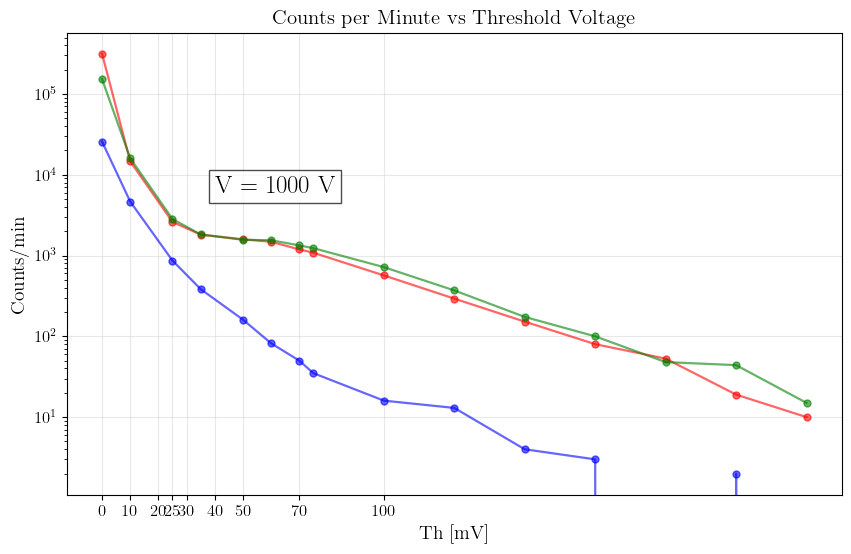

In [136]:
# Probabilmente da buttare 
# 1000 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_1000V['Th [mV]'], df_1000V['Counts/min_1'], linestyle='-', marker='o', markersize= 5, linewidth=1.6,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1000V['Th [mV]'], df_1000V['Counts/min_2'], linestyle='-', marker='o', markersize= 5,linewidth=1.6,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1000V['Th [mV]'], df_1000V['Counts/min_3'], linestyle='-', marker='o', markersize= 5, linewidth=1.6,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)

plt.grid(True, color='lightgray',alpha=0.5)
plt.yscale('log')
plt.xticks(ticks=[0, 10, 20, 25, 30, 40, 50, 70, 100], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 6000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [177]:
data_1050V = {
    'V [V]': np.full(17 , 1050),  
    'Th [mV]': [0, 10, 25, 35, 50, 60, 65, 75, 90 ,100, 125, 150, 175, 200, 225, 250, 255, ],     
    'Counts/min_1': [27995, 4848 , 1013, 426, 147, 75, 76 , 55, 29 ,17, 13, 5, 2, 4, 2, 2, 1,],  
    'Counts/min_2': [286355, 25740, 5798, 2983, 1897, 1697, 1672,1652, 1438,1293, 826, 452, 274, 183, 103, 68,64, ], 
    'Counts/min_3': [198399, 26699, 6532, 3260, 1870, 1689,1635 , 1639, 1510,1418, 955, 563, 363, 251, 153, 106, 82,], 
    'N_doppie_12' : [7794, 1473, 636, 303, 103, 38, 48 , 36, 17,9, 5, 2, 1, 1, 1, 2, 1, ], # Questo non ci serve
    'N_doppie_13' : [3828, 1185, 481, 202, 69, 23, 29, 19, 7, 4, 4, 0, 1, 1, 0, 2, 1,], # Questo ci serve
    'N_doppie_23' : [35165, 2009, 1413, 1386, 1359, 1312,1280 , 1301,1127 , 979, 527, 238, 128, 90, 34, 18, 21, ], # Questo non ci serve 
    'N_triple' : [2403, 1150, 477, 199, 68, 23, 28 , 19, 7,4, 3, 0, 1, 0, 0, 2, 1]
}
df_1050V = pd.DataFrame(data_1050V)

In [178]:
# Efficienza 
epsilon_2 = df_1050V['N_triple'] / df_1050V['N_doppie_13'] 
df_1050V['epsilon_2'] = epsilon_2

df_1050V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,1050,0,27995,286355,198399,7794,3828,35165,2403,0.627743
1,1050,10,4848,25740,26699,1473,1185,2009,1150,0.970464
2,1050,25,1013,5798,6532,636,481,1413,477,0.991684
3,1050,35,426,2983,3260,303,202,1386,199,0.985149
4,1050,50,147,1897,1870,103,69,1359,68,0.985507
5,1050,60,75,1697,1689,38,23,1312,23,1.000000
6,1050,65,76,1672,1635,48,29,1280,28,0.965517
7,1050,75,55,1652,1639,36,19,1301,19,1.000000
8,1050,90,29,1438,1510,17,7,1127,7,1.000000
9,1050,100,17,1293,1418,9,4,979,4,1.000000


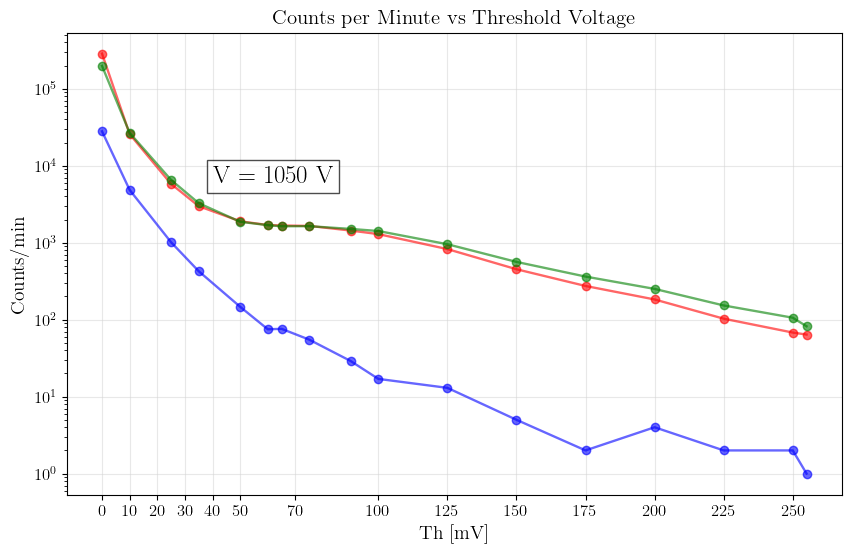

In [179]:
# 1050 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_1050V['Th [mV]'], df_1050V['Counts/min_1'], linestyle='-', marker = 'o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1050V['Th [mV]'], df_1050V['Counts/min_2'], linestyle='-', marker= 'o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1050V['Th [mV]'], df_1050V['Counts/min_3'], linestyle='-', marker = 'o', linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)

plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 70,  100, 125, 150, 175, 200, 225, 250], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.yscale('log')
# Add the fixed value of V to the plot :
plt.text(40, 6000, 'V = 1050 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [219]:
data_1100V = {
    'V [V]': np.full(17, 1100),  
    'Th [mV]': [0, 10, 25, 35, 50, 65, 75, 85, 90, 100, 110, 125, 150, 175, 200, 225, 255 ],     
    'Counts/min_1': [35821, 8548, 2223, 1139, 470, 234, 144, 119, 82, 46, 41, 21, 18, 15, 7, 2, 4],  
    'Counts/min_2': [313701, 39788, 12653,  6604, 3127, 2097, 1835, 1746, 1698, 1591, 1447, 1429, 1101, 785, 555, 360, 218, ], 
    'Counts/min_3': [250563, 40022, 13753, 7217, 3405, 2154, 1825, 1699, 1676, 1607,  1502, 1443,  1292, 977, 727, 436, 287, ], 
    'N_doppie_12' : [9995, 1812, 1081, 704, 332, 165, 94, 75, 52, 22, 25, 11, 9, 4, 3, 1, 2], # Questo non ci serve
    'N_doppie_13' : [4700, 1285, 837, 526, 226, 114, 51, 45, 30, 12, 10, 8, 5, 4, 0, 0, 1], # Questo ci serve
    'N_doppie_23' : [39803, 3012, 1483, 1429, 1436, 1397, 1332 , 1308, 1340, 1268, 1167, 1106, 828, 498, 326, 168, 90], # Questo non ci serve 
    'N_triple' : [2729, 1150, 830, 522, 225, 111, 49, 42, 30, 12, 10, 8, 4, 3, 0, 0, 1]
}
df_1100V = pd.DataFrame(data_1100V)

In [220]:
# Efficienza 
epsilon_2 = df_1100V['N_triple'] / df_1100V['N_doppie_13'] 
df_1100V['epsilon_2'] = epsilon_2

df_1100V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,1100,0,35821,313701,250563,9995,4700,39803,2729,0.580638
1,1100,10,8548,39788,40022,1812,1285,3012,1150,0.894942
2,1100,25,2223,12653,13753,1081,837,1483,830,0.991637
3,1100,35,1139,6604,7217,704,526,1429,522,0.992395
4,1100,50,470,3127,3405,332,226,1436,225,0.995575
5,1100,65,234,2097,2154,165,114,1397,111,0.973684
6,1100,75,144,1835,1825,94,51,1332,49,0.960784
7,1100,85,119,1746,1699,75,45,1308,42,0.933333
8,1100,90,82,1698,1676,52,30,1340,30,1.000000
9,1100,100,46,1591,1607,22,12,1268,12,1.000000


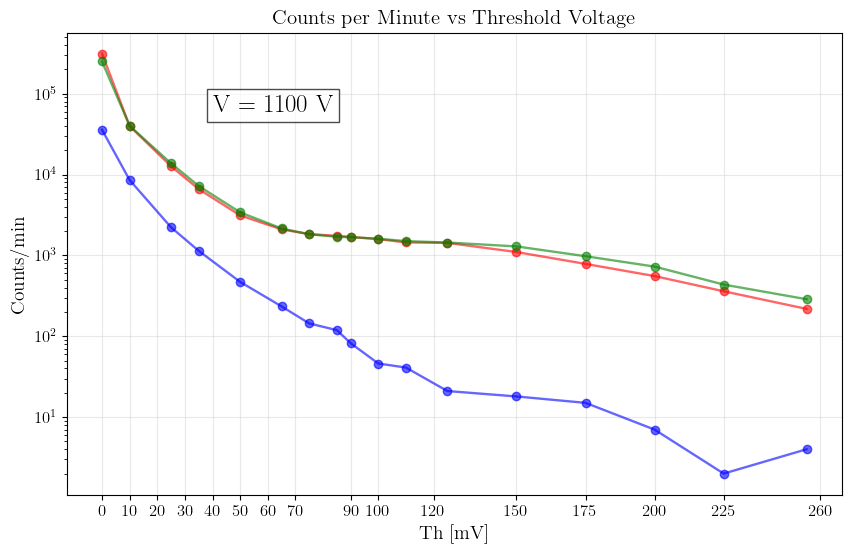

In [221]:
# 1100 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_1100V['Th [mV]'], df_1100V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1100V['Th [mV]'], df_1100V['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1100V['Th [mV]'], df_1100V['Counts/min_3'], linestyle='-', marker='o',linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.grid(True, color='lightgray',alpha=0.5)
plt.yscale('log')
plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 90, 100, 120, 150, 175, 200, 225, 260], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 60000, 'V = 1100 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

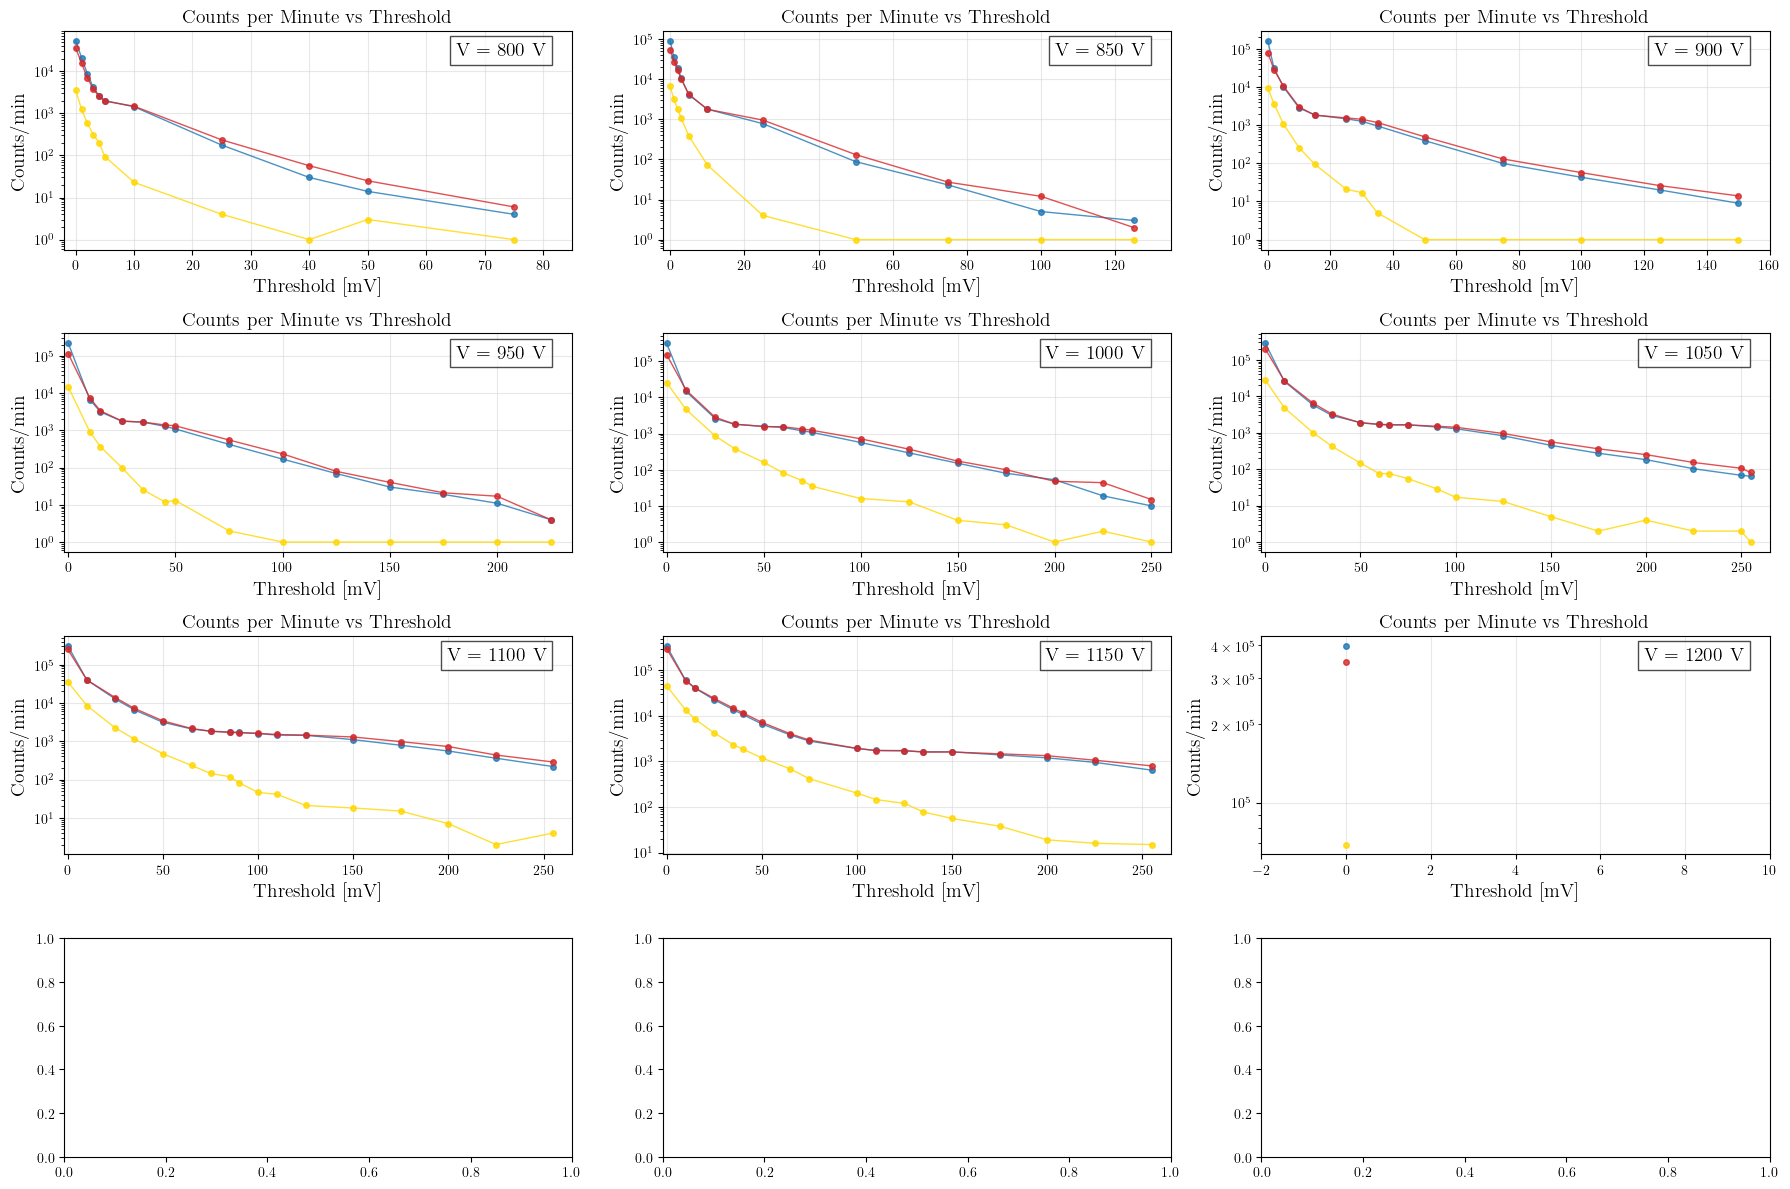

In [284]:
FONT_SIZE = 14
FONT_SIZE = 14
MARKER_SIZE = 4
LINE_WIDTH = 1
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.5

# List of dataframes and corresponding voltages
dataframes = [df_800V, df_850V, df_900V, df_950V, df_1000V, df_1050V, df_1100V, df_1150V, df_1200V, ]#  df_1250V, df_1300V]  # Replace/add your actual dataframes here
voltages = [800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, ]#  1250, 1300]  # Replace/add the corresponding voltage values

# Create subplots grid (1 row per dataframe)
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()
# Loop over dataframes and axes
for i, (df, V) in enumerate(zip(dataframes, voltages)):
        ax = axes_flat[i]

        # Tracciamento delle curve con marker personalizzati
        ax.plot(df['Th [mV]'], np.where(df['Counts/min_1'] == 0, 1, df['Counts/min_1']),
                linestyle='-', marker='o', linewidth=1, markersize=MARKER_SIZE,
                color='gold', alpha=0.8, label='Counts/min_1')
        
        ax.plot(df['Th [mV]'], np.where(df['Counts/min_2'] == 0, 1, df['Counts/min_2']),
                linestyle='-', marker='o', linewidth=1, markersize=MARKER_SIZE,
                color='tab:blue', alpha=0.8, label='Counts/min_2')
        
        ax.plot(df['Th [mV]'], np.where(df['Counts/min_3'] == 0, 1, df['Counts/min_3']),
                linestyle='-', marker='o', linewidth=1, markersize=MARKER_SIZE,
                color='tab:red', alpha=0.8, label='Counts/min_3')
        
        ax.set_title(f'Counts per Minute vs Threshold', fontsize = FONT_SIZE)
        ax.set_xlabel('Threshold [mV]', fontsize = FONT_SIZE)
        ax.set_ylabel('Counts/min', fontsize = FONT_SIZE)
        ax.set_xlim(-2, df['Th [mV]'].max() + 10)
        ax.grid(True, color='lightgray', alpha = 0.5)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        ax.text(0.95, 0.95,  # Coordinate relative (x, y)
                f'V = {V} V', 
                fontsize = FONT_SIZE, 
                bbox = dict(facecolor='white', alpha=0.7, edgecolor='black'),
                transform = ax.transAxes,  # Trasforma le coordinate in proporzionali all'area del grafico
                ha = 'right',  # Allineamento orizzontale a destra
                va = 'top')    # Allineamento verticale in alto

# Adjust layout
plt.tight_layout()
plt.show()

In [277]:
data_1150V = {
    'V [V]': np.full(18, 1150),  
    'Th [mV]': [0, 10, 15, 25, 35, 40, 50, 65, 75, 100, 110, 125, 135, 150, 175, 200, 225, 255],     
    'Counts/min_1': [46209, 13441, 8450, 4220, 2353, 1868, 1205, 685, 419, 202, 146 , 120, 78, 56, 38, 19, 16, 15 ],  
    'Counts/min_2': [348310, 60355, 40564, 22759, 13714, 10756,  6694, 3818, 2807,1928, 1744 ,1707, 1634, 1628, 1395, 1202, 957, 644, ], 
    'Counts/min_3': [301181, 59911, 41016, 24302, 14865, 11703, 7276, 4057, 2954, 1937, 1739 ,1738, 1604 , 1615, 1473, 1340, 1065, 800 ], 
    'N_doppie_12' : [12235, 2306, 1741, 1442, 1111, 960, 715, 461, 280, 147, 96 ,75, 42 , 41, 13, 8, 6, 3], # Questo non ci serve
    'N_doppie_13' : [5677, 1521, 1282, 1149, 865, 727, 539, 348, 211, 96, 58 ,52, 25 , 25, 10, 5, 3, 3], # Questo ci serve
    'N_doppie_23' : [43793, 5222, 3100, 1878, 1524, 1464, 1413, 1424, 1390, 1342, 1321 ,1339, 1282 , 1310, 1098, 891, 639, 388], # Questo non ci serve 
    'N_triple' : [3087, 1190, 1160, 1129, 862, 719, 534, 344, 208, 93, 58, 51, 24, 25, 9, 4, 3, 3]
}
df_1150V = pd.DataFrame(data_1150V)

In [278]:
# Efficienza 
epsilon_2 = df_1150V['N_triple'] / df_1150V['N_doppie_13'] 
df_1150V['epsilon_2'] = epsilon_2

df_1150V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,1150,0,46209,348310,301181,12235,5677,43793,3087,0.543773
1,1150,10,13441,60355,59911,2306,1521,5222,1190,0.782380
2,1150,15,8450,40564,41016,1741,1282,3100,1160,0.904836
3,1150,25,4220,22759,24302,1442,1149,1878,1129,0.982594
4,1150,35,2353,13714,14865,1111,865,1524,862,0.996532
5,1150,40,1868,10756,11703,960,727,1464,719,0.988996
6,1150,50,1205,6694,7276,715,539,1413,534,0.990724
7,1150,65,685,3818,4057,461,348,1424,344,0.988506
8,1150,75,419,2807,2954,280,211,1390,208,0.985782
9,1150,100,202,1928,1937,147,96,1342,93,0.968750


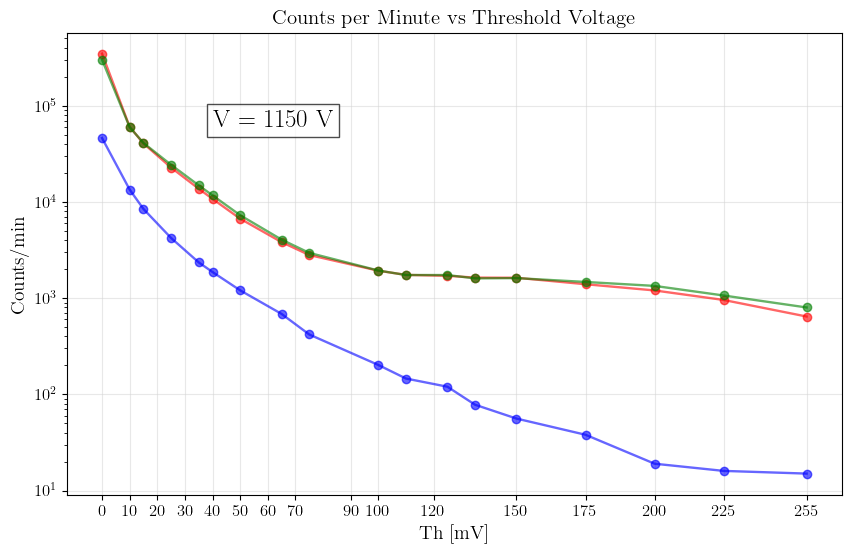

In [279]:
# 1150 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_1150V['Th [mV]'], df_1150V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1150V['Th [mV]'], df_1150V['Counts/min_2'], linestyle='-', marker='o', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1150V['Th [mV]'], df_1150V['Counts/min_3'], linestyle='-', marker='o',linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.grid(True, color='lightgray',alpha=0.5)
plt.yscale('log')
plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 90, 100, 120, 150, 175, 200, 225, 255], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 60000, 'V = 1150 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [300]:
data_1200V = {
    'V [V]': np.full(8, 1200),  
    'Th [mV]': [0, 10, 25, 35, 50, 60, 75, 100, ],     
    'Counts/min_1': [69140, 19445, 7404, 4623, 2534, 1757, 1057, 546, ],  
    'Counts/min_2': [397870, 83597, 35363, 23608 ,13790, 9545, 5813, 3088,  ], 
    'Counts/min_3': [344291, 87243, 37006, 25246 ,15025, 10302, 6473, 3271, ], 
    'N_doppie_12' : [15795, 3294,  1721, 1439,1177, 886, 640, 364, ], # Questo non ci serve
    'N_doppie_13' : [7166, 2056, 1208, 1127,938, 659, 488, 245, ], # Questo ci serve
    'N_doppie_23' : [46960,8478, 2624, 1830 ,1603, 1360,  1414, 1401, ], # Questo non ci serve 
    'N_triple' : [3630, 1357, 1194, 1097, 928, 656, 485, 243]
}
df_1200V = pd.DataFrame(data_1200V)

In [301]:
# Efficienza 
epsilon_2 = df_1200V['N_triple'] / df_1200V['N_doppie_13'] 
df_1200V['epsilon_2'] = epsilon_2

df_1200V

,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,epsilon_2
0,1200,0,69140,397870,344291,15795,7166,46960,3630,0.506559
1,1200,10,19445,83597,87243,3294,2056,8478,1357,0.660019
2,1200,25,7404,35363,37006,1721,1208,2624,1194,0.988411
3,1200,35,4623,23608,25246,1439,1127,1830,1097,0.973381
4,1200,50,2534,13790,15025,1177,938,1603,928,0.989339
5,1200,60,1757,9545,10302,886,659,1360,656,0.995448
6,1200,75,1057,5813,6473,640,488,1414,485,0.993852
7,1200,100,546,3088,3271,364,245,1401,243,0.991837


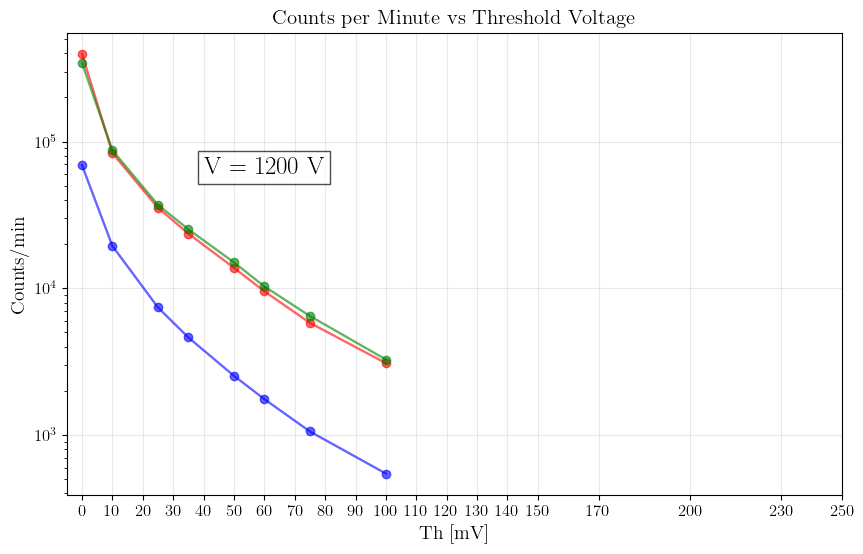

In [302]:
# 1200 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_1200V['Th [mV]'], df_1200V['Counts/min_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1200V['Th [mV]'], df_1200V['Counts/min_2'], linestyle='-', marker='o',linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1200V['Th [mV]'], df_1200V['Counts/min_3'], linestyle='-', marker='o',linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers



plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 170, 200, 230, 250], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 60000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [ ]:
data_1300V = {
    'V [V]': np.full(10, 1300),  
    'Th [mV]': [10, 30, 35, 40, 45, ],     
    'Counts/min_1': [10347*2, 2727*2, 2098*2, 1703*2, *2, *2, *2, *2, *2, *2,],  
    'Counts/min_2': [41705*2, 14531*2, 11876*2, 9791*2, *2, *2, *2, *2, *2, *2,], 
    'Counts/min_3': [47314*2, 15902*2, 13285*2, 11073*2, *2, *2, *2, *2, *2, *2,], 
}
df_1300V = pd.DataFrame(data_1300V)

In [ ]:
# 1300 V : 

plt.figure(figsize=(10, 6))

plt.plot(df_1300V['Th [mV]'], df_1300V['Counts/min_1'], linestyle='-', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1300V['Th [mV]'], df_1300V['Counts/min_2'], linestyle='-', linewidth=1.7,color='r', alpha=0.6) # add "marker = 'o'" if you need the markers
plt.plot(df_1300V['Th [mV]'], df_1300V['Counts/min_3'], linestyle='-', linewidth=1.7,color='g', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)

plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 60000, 'V = 1300 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

In [42]:
# Combine all DataFrames and reset index
combined_data = pd.concat([df_800V, df_900V, df_950V, df_1000V, df_1100V, df_1200V, df_1300V]).reset_index(drop=True)
combined_data


,V [V],Th [mV],Counts/min_1,Counts/min_2,Counts/min_3
0,800,0,48716,62560,84164
1,800,1,986,20934,15054
2,800,3,210,3946,3622
3,800,5,50,1978,1946
4,800,10,6,1490,1486
5,800,20,4,342,480
6,800,50,2,12,24
7,900,0,194938,232942,389006
8,900,2,3292,31012,28338
9,900,3,2222,20626,20060


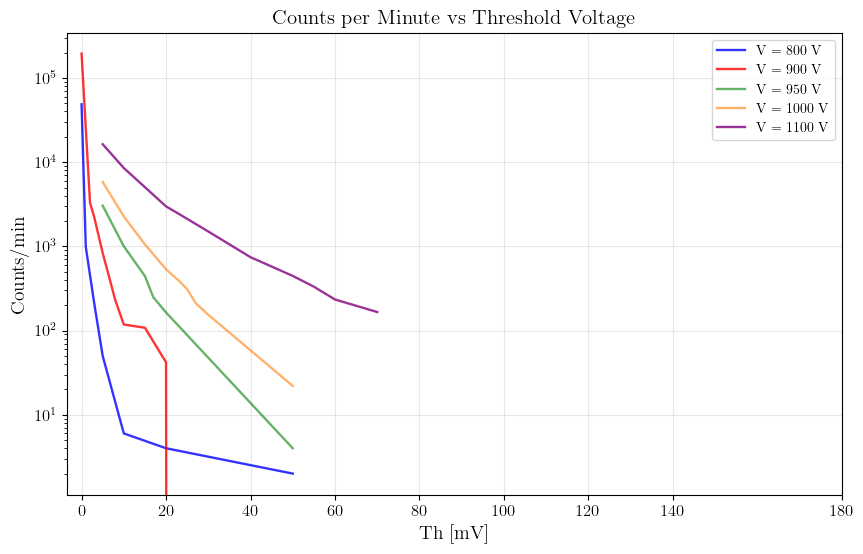

In [39]:
plt.figure(figsize=(10, 6))

# Plot each DataFrame with a different color
plt.plot(df_800V['Th [mV]'], df_800V['Counts/min_1'], linestyle='-', linewidth=1.7, color='b', alpha=0.8, label='V = 800 V')
plt.plot(df_900V['Th [mV]'], df_900V['Counts/min_1'], linestyle='-', linewidth=1.7, color='r', alpha=0.8, label='V = 900 V')
plt.plot(df_950V['Th [mV]'], df_950V['Counts/min_1'], linestyle='-', linewidth=1.7, color='g', alpha=0.6, label='V = 950 V')
plt.plot(df_1000V['Th [mV]'], df_1000V['Counts/min_1'], linestyle='-', linewidth=1.7, color='tab:orange', alpha=0.6, label='V = 1000 V')
plt.plot(df_1100V['Th [mV]'], df_1100V['Counts/min_1'], linestyle='-', linewidth=1.7, color='purple', alpha=0.8, label='V = 1100 V')

plt.title('Counts per Minute vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('Counts/min', fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray', alpha=0.5)

# Set x-ticks and y-ticks
plt.xticks(ticks=[0, 20, 40, 60, 80, 100, 120, 140, 180], fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend()

plt.show()

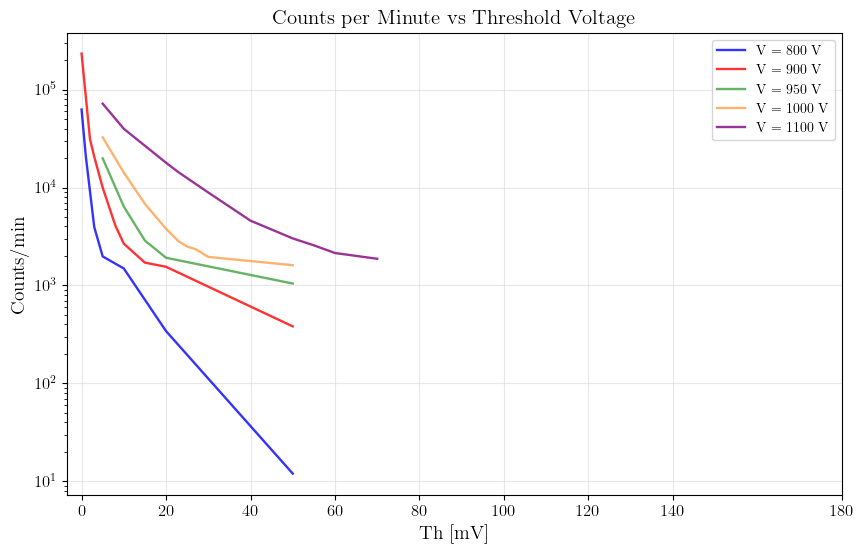

In [40]:
# Secondo scintillatore : 

plt.figure(figsize=(10, 6))

# Plot each DataFrame with a different color
plt.plot(df_800V['Th [mV]'], df_800V['Counts/min_2'], linestyle='-', linewidth=1.7, color='b', alpha=0.8, label='V = 800 V')
plt.plot(df_900V['Th [mV]'], df_900V['Counts/min_2'], linestyle='-', linewidth=1.7, color='r', alpha=0.8, label='V = 900 V')
plt.plot(df_950V['Th [mV]'], df_950V['Counts/min_2'], linestyle='-', linewidth=1.7, color='g', alpha=0.6, label='V = 950 V')
plt.plot(df_1000V['Th [mV]'], df_1000V['Counts/min_2'], linestyle='-', linewidth=1.7, color='tab:orange', alpha=0.6, label='V = 1000 V')
plt.plot(df_1100V['Th [mV]'], df_1100V['Counts/min_2'], linestyle='-', linewidth=1.7, color='purple', alpha=0.8, label='V = 1100 V')

plt.title('Counts per Minute vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('Counts/min', fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray', alpha=0.5)

# Set x-ticks and y-ticks
plt.xticks(ticks=[0, 20, 40, 60, 80, 100, 120, 140, 180], fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend()

plt.show()

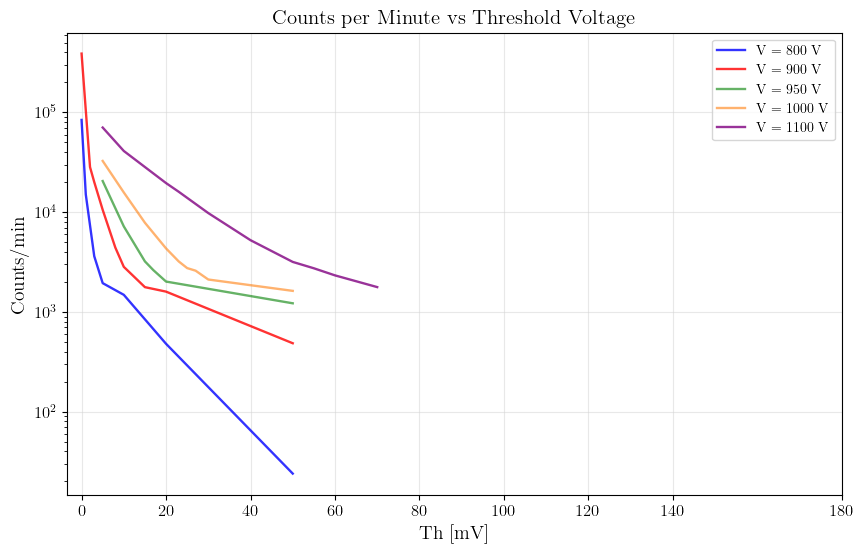

In [41]:
# Secondo scintillatore : 

plt.figure(figsize=(10, 6))

# Plot each DataFrame with a different color
plt.plot(df_800V['Th [mV]'], df_800V['Counts/min_3'], linestyle='-', linewidth=1.7, color='b', alpha=0.8, label='V = 800 V')
plt.plot(df_900V['Th [mV]'], df_900V['Counts/min_3'], linestyle='-', linewidth=1.7, color='r', alpha=0.8, label='V = 900 V')
plt.plot(df_950V['Th [mV]'], df_950V['Counts/min_3'], linestyle='-', linewidth=1.7, color='g', alpha=0.6, label='V = 950 V')
plt.plot(df_1000V['Th [mV]'], df_1000V['Counts/min_3'], linestyle='-', linewidth=1.7, color='tab:orange', alpha=0.6, label='V = 1000 V')
plt.plot(df_1100V['Th [mV]'], df_1100V['Counts/min_3'], linestyle='-', linewidth=1.7, color='purple', alpha=0.8, label='V = 1100 V')

plt.title('Counts per Minute vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('Counts/min', fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray', alpha=0.5)

# Set x-ticks and y-ticks
plt.xticks(ticks=[0, 20, 40, 60, 80, 100, 120, 140, 180], fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend()

plt.show()